<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">
# Project 4
### Web Scraping Job Postings

# <u>The Right Job</u>

Our firm offers technology and scientific solutions and wants to be competitive in the hiring market. As a Data Scientist in our data team, I have two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

# A: <u>Data</u>

## A_1: Data Collection

Working in a team of 10 data scientists/analysts, we start off collecting data by <b>web scraping</b> relevant job websites. As more companies aim to become more data driven, we limit our scope for data related job positions, e.g data scientist, data analyst, business intelligence etc.<br>
    
I was assigned the task to scrap the job sites, indeed.com and glints.sg for the relevant job postings. The iPython file for the web scraping scripts for both sites can be view here:<br>
1. <a href = "./assets/webscraping/glints_web_scraping.ipynb">web scrape glints.sg</a><br>
2. <a href = "./assets/webscraping/indeed_web_scraping.ipynb">web scrape indeed.com</a>

We realised that to potentially get any effective findings for my main objectives, we had to retrieve the job title, company, job description and salary for the job posting.

After the web scraping our data, we combined our data. Afterwhich, my colleague, Guan Fong, took tremendous effort to standardize and clean up our raw data, for all to use.
    

## A_2: Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [59]:
## Loading the dataset

df = pd.read_csv('./assets/data/combined3.csv')

In [60]:
## Understand the shape of the dataset

df.shape

(1506, 4)

As above, the dataset currently comprises 1506 job listings.

There are 4 columns in the dataset, which are actually the specific type of information we want to retrieve as mentioned previously.

As evident in the dataframe below, the job_description actually comprises the entire passage of the job description and requirements from each job listing. Additionally, salary column carries values of salary by month.

In [61]:
## Having an idea of how the data looks

df.head()

,job_title,job_description,salary,company
0,"VP, Business Data Analyst, Enterprise Data Str...","VP, Business Data Analyst, Enterprise Data St...",6000,United Overseas Bank
1,Data Architect,An exciting Data Architect role has just bec...,15000,Robert Walters (Singapore) Pte Ltd
2,Data Analyst,Leading the way in International Banking. We...,4500,Standard Chartered Bank Singapore
3,Data Architect,Leading the way in International Banking. We...,4500,Standard Chartered Bank Singapore
4,Data Manager,"This role reports to the project lead, Retai...",4500,Standard Chartered Bank Singapore


In our preliminary investigation, we learned that there were duplicated data due to the same job position advertised on different sites. We decide to drop duplicated rows, leaving only the first.

Additionally, the value type of the salary are non-numeric, and therefore need to be converted.

We carry the above steps in the following:

In [62]:
## To convert salary to numeric type, if unable, NaN value is input instead

df['salary'] = pd.to_numeric(df['salary'],errors='coerce')

In [63]:
## To drop duplicate data rows

df.drop_duplicates(subset = 'job_description',inplace = True)

In [64]:
df.shape

(1415, 4)

91 duplicates were removed

# B: <u>Factors that impact salary</u>

We want to predict salary by information from job description. To achieve this, Natural Language Processing (NLP) will be applied to the job description. Simultaneously, because the exact amount of salary is subjected to various factors, which are not captured within this dataset, prediction of salary will be framed as a classification of the salary range rather than a linear regression of continuous values.

## B_1: Feature engineering
### B_1_1: Class assignment for job title

<b> Data Scientist </b> will be assigned class 1 <br>
<b> Data Analyst </b> will be assigned class 2 <br>
<b> Business Intelligence /  Business Analyst </b> will be assigned class 3 <br>
<b> Others </b> will be assigned 0

In [65]:
def title_class(x):
    if 'scientist' in x.lower():
        return 1
    elif 'analyst' in x.lower() and 'business' not in x.lower():
        return 2
    elif 'business intelligence' in x.lower() or ('analyst' in x.lower() and 'business' in x.lower()):
        return 3
    else:
        return 0

In [66]:
df['title_class'] = df['job_title'].apply(title_class)

### B_1_2: Class assignment for senior roles

In [67]:
## List of terms for senior positons
senior_list = ['vp','president','senior', 'manager']

def senior_class(x):
    if any(elem in x.lower() for elem in senior_list):
        return 1
    else:
        return 0

In [68]:
df['senior'] = df['job_title'].apply(senior_class)

### B_1_3: Cleaning Null Salary

In [69]:
## Dropping null salary values

df_B = df.dropna(subset=['salary']) ## df_B will be the dataframe used for Part B: Factors that impact salary

## Note on df_B: df_B is created separately as we have dropped null values in salary 
## for the purpose of running models to predict price

## Note that df will be used for Part C: Factors that distinguish job category, whereby it's null salary values
## will not affect the prediction of job class


In [70]:
## Reset index of dataframe for proper alignment later

df.reset_index(inplace=True,drop = True)
df_B.reset_index(inplace=True,drop = True)

### B_1_4: Class assignment for salary

The salary will be classed based on their percentile position

### Salary Banding <br>
<b>Below 4500/ (Below 25th percentile)</b> will be assigned class 1<br>
<b>4500 - 6000 / (25th percentile to 75th percentile)</b> will be assigned class 2<br>
<b>Above 6000 / (Above 75th percentile)</b> will be assigned class 3

In [75]:
print df['salary'].describe()
print 'salary median: ',df_B['salary'].median()

 count     1071.000000
mean      5125.706816
std       2318.702247
min        600.000000
25%       4500.000000
50%       4500.000000
75%       6000.000000
max      20000.000000
Name: salary, dtype: float64
salary median:  4500.0


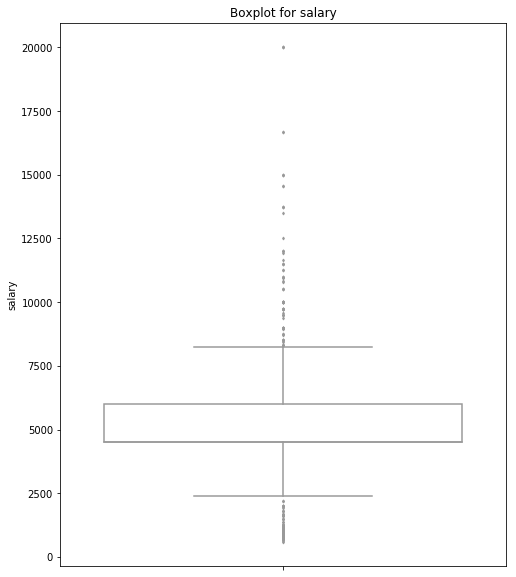

In [76]:
plt.figure(figsize=(8,10))
sns.boxplot(df_B['salary'],orient='v',color = 'white',fliersize=2.0)
plt.title('Boxplot for salary')
plt.show()

In [77]:
## This function will assign the banding

def band_salary(x):
    if x < 4500:
        return 1
    elif 4500<=x<=6000:
        return 2
    elif 6000<x:
        return 3

df_B['salary_band'] = df_B['salary'].apply(band_salary)

C:\ProgramData\Anaconda3\envs\py27_\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## B_2: Tokenization and Vectorization of Job Description

As mentioned previously, we will use NLP of the job description in order to predict the classification of the salary band class.
This involves lemmatization to ensure same words in varying forms, e.g help and helping, are designated the same meaning. After which we will count vectorize the text, which may assist to discover a pattern of occurrence of specific words for each class.

In [80]:
import re

## Remove punctuations
df_B['job_description'] = df_B['job_description'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())

C:\ProgramData\Anaconda3\envs\py27_\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [82]:
## Creating a text lemmatizer and tokenizer

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t,pos = 'v') for t in word_tokenize(articles)]

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                       strip_accents = 'unicode',
                       stop_words = 'english',
                       lowercase = True,
                       token_pattern = r'\b[a-zA-Z]{3,}\b', # keeps words of 3 or more characters
                       max_df = 0.5,
                       min_df = 10)


In [83]:
## Creating a dataframe of the words and their occurrence in each job description

df_2 = pd.DataFrame(tf_vectorizer.fit_transform(df_B['job_description']).todense(),columns = tf_vectorizer.get_feature_names())

In [85]:
## Adding the relevant categorial columns to the dataframe which may act as predictors
df_2['title_class'] = df_B['title_class'].astype('int')
df_2['senior_class'] = df_B['senior'].astype('int')

## Adding the target to the dataframe
df_2['salary_band'] = df_B['salary_band'].astype('int')

## B_3: Running a grid searched optimized Logistic Regression

### B_3_1: Creating the test and training predictors and test sets

In [44]:
## Selecting predictors and target

X = df_2.iloc[:,:-1] ## All columns except salary_band
y = df_2.iloc[:,-1]  ## salary_band

In [51]:
## Checking the proportion of each class

y.value_counts().sort_index()/len(y)

1    0.249300
2    0.562092
3    0.188609
Name: salary_band, dtype: float64

Class imbalance is present, therefore we have to upsample the training dataset in order for the classifier model to be fitted accurately

In [52]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y,stratify = y, random_state = 42,test_size = 0.33)

In [55]:
## Carrying out upsampling on training set to solve problem of imbalance class

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42,ratio=1.0)
X_train_res, y_train_res = ros.fit_sample(X_train,y_train)

pd.Series(y_train_res).value_counts()

C:\ProgramData\Anaconda3\envs\py27_\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


3    403
2    403
1    403
dtype: int64

For the above, we used the RandomOverSample to upsample the minority classes. We now have equal proportions of each class

### B_3_2: Running the grid search and fitting logistic regression

To test a basic model classifier, we use a simple multinomial logistic regression. After that, we can use its performance as a baseline to compare other more complex models with.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV


clf = LogisticRegression()

## Parameters to test with grid search

parameters = {'C':[1.0,0.1,0.01],'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

clf_gs = GridSearchCV(clf,parameters)
clf_gs.fit(X_train_res,y_train_res)

C:\ProgramData\Anaconda3\envs\py27_\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\py27_\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 0.1, 0.01], 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

### B_3_3: Testing fitted logistic regression

In [58]:
## Getting predicted y of test dataset with fitted model
y_pred_gs = clf_gs.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

## Checking the result for the above
print pd.DataFrame(confusion_matrix(y_test,y_pred_gs),columns = ['pred_1','pred_2','pred_3'], index= ['true_1','true_2','true_3'])
print classification_report(y_test,y_pred_gs)

        pred_1  pred_2  pred_3
true_1      52      31       5
true_2      20     153      26
true_3       8      25      34
             precision    recall  f1-score   support

          1       0.65      0.59      0.62        88
          2       0.73      0.77      0.75       199
          3       0.52      0.51      0.52        67

avg / total       0.67      0.68      0.67       354



### B_3_4: Interpreting the model's performance:

This logistic regression performance relative well, being able to accurately pick out the true classes around 68% of the instances.
Looking deeper however, it is evident that the model is only able to accurately predict band 3 salary (high) only approximately 50% of the instances

## B_4: Running a grid searched optimized Support Vector Machine (SVM)

### B_4_1: Fitting the SVM

In [88]:
from sklearn.svm import SVC

svm = SVC(random_state =42)

parameters = {'C':[1.0,0.1,0.01],'kernel':['rbf','linear', 'poly', 'rbf', 'sigmoid'],'degree':[3,4],'random_state':[42]}

svc_gs =  GridSearchCV(svm,parameters)
svc_gs.fit(X_train_res,y_train_res)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid'], 'C': [1.0, 0.1, 0.01], 'random_state': [42], 'degree': [3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

### B_4_2: Testing the fitted SVM

In [90]:
y_pred_gs = svc_gs.predict(X_test)

## Checking the result for the above
print pd.DataFrame(confusion_matrix(y_test,y_pred_gs),columns = ['pred_1','pred_2','pred_3'], index= ['true_1','true_2','true_3'])
print classification_report(y_test,y_pred_gs)

        pred_1  pred_2  pred_3
true_1      53      32       3
true_2      31     143      25
true_3      11      21      35
             precision    recall  f1-score   support

          1       0.56      0.60      0.58        88
          2       0.73      0.72      0.72       199
          3       0.56      0.52      0.54        67

avg / total       0.65      0.65      0.65       354



### B_4_3: Interpreting the model's performance
The support vector classifier machine does not compare well with the logistic regression. The performance for recall of band 1 and 2 salaries has marginally improved. However overall, with an f1-score of 0.65, this model is marginally less accurate than the logistic regression (f1-score = 0.67).

# C: <u>Factors that distinguish job category</u>

## C_1: Tokenization and Vectorization of Job Description
Similar to the previous part, we will utilize the job description to determine the job category. So once again, NLP of the job description is required. The process to apply NLP/lemmatization/word vectorization is similar to the previous part.

In [94]:
## Remove punctuations
import re

df['job_description'] = df['job_description'].apply(lambda x: re.sub('[^ a-zA-Z+]',' ',x).lower())

tf_vectorizer.fit_transform(df['job_description'])

df_3 = pd.DataFrame(tf_vectorizer.fit_transform(df['job_description']).todense(),columns = tf_vectorizer.get_feature_names())

In [96]:
## Adding the target to the dataframe

df_3['title_class'] = df['title_class'].astype('int')

## C_2: Exploring the data

In [112]:
## Getting the top 50 most frequent words in job description for each class

## Data scientist
datasci_top_50_words = df_3[df_3['title_class'] == 1].iloc[:,:-1].T.sum(axis=1).sort_values(ascending=False).head(50) 

## Data Analyst
dataana_top_50_words = df_3[df_3['title_class'] == 2].iloc[:,:-1].T.sum(axis=1).sort_values(ascending=False).head(50)

## Business Intelligence
bizint_top_50_words = df_3[df_3['title_class'] == 3].iloc[:,:-1].T.sum(axis=1).sort_values(ascending=False).head(50)

<u><b>Top words for each job category</b></u><br>
Below, we can see the terms that are frequently used for each job category. The top terms highlight the knowledge and skillsets that are emphasized for each job category.<br>
For example, 'learn'/'model'/'science'/'machine' are the top terms for a data scientist, thereby empahsizing requirement for knowledge and application of machine learning and modelling techniques. For the data analyst, 'analytics'/'report'/'tool' being top emphasizes the responsibilities of the role requiring competence in manipulating, analysing and reporting using data.

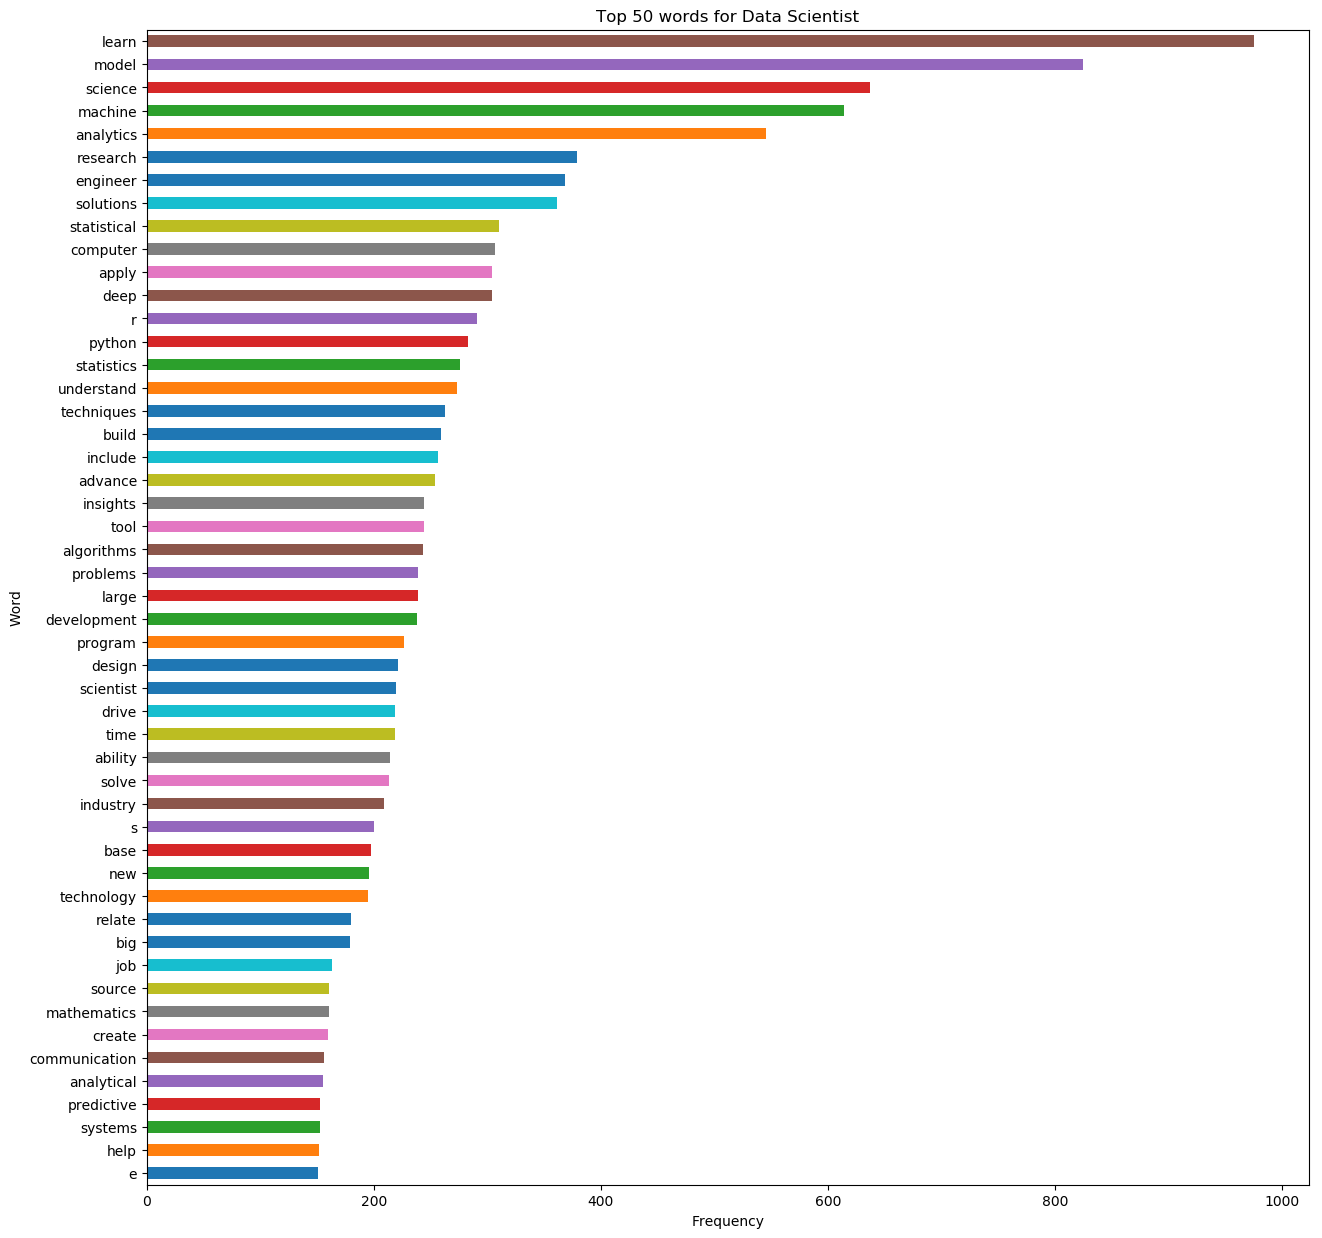

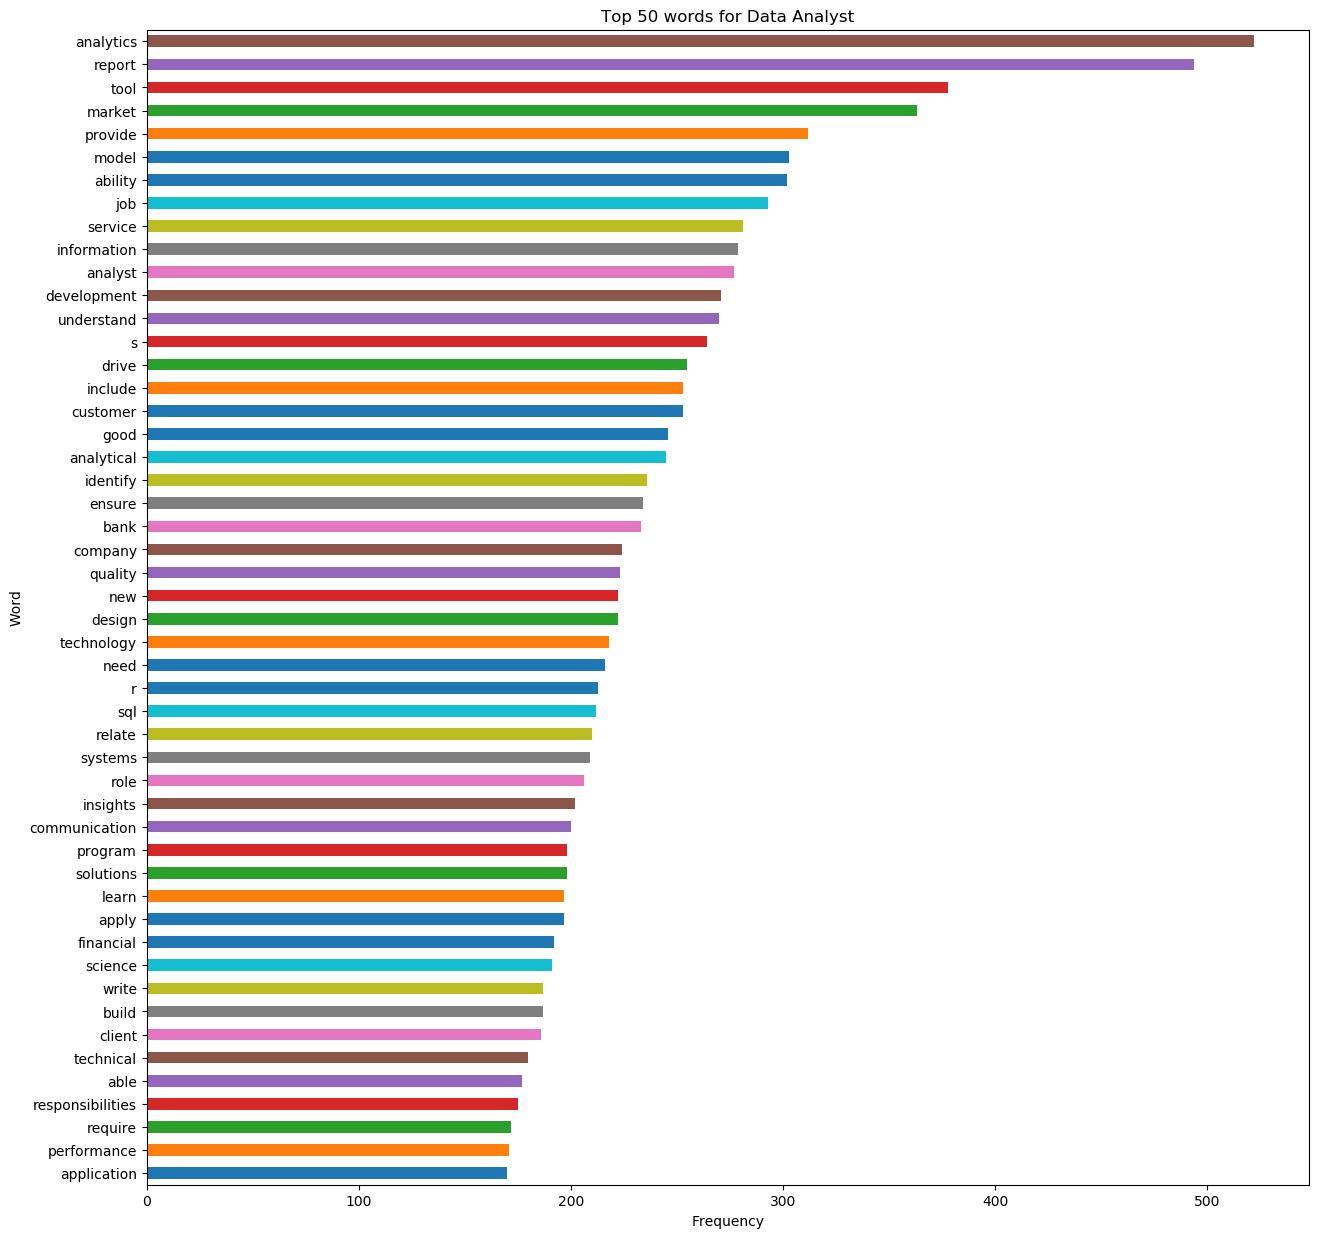

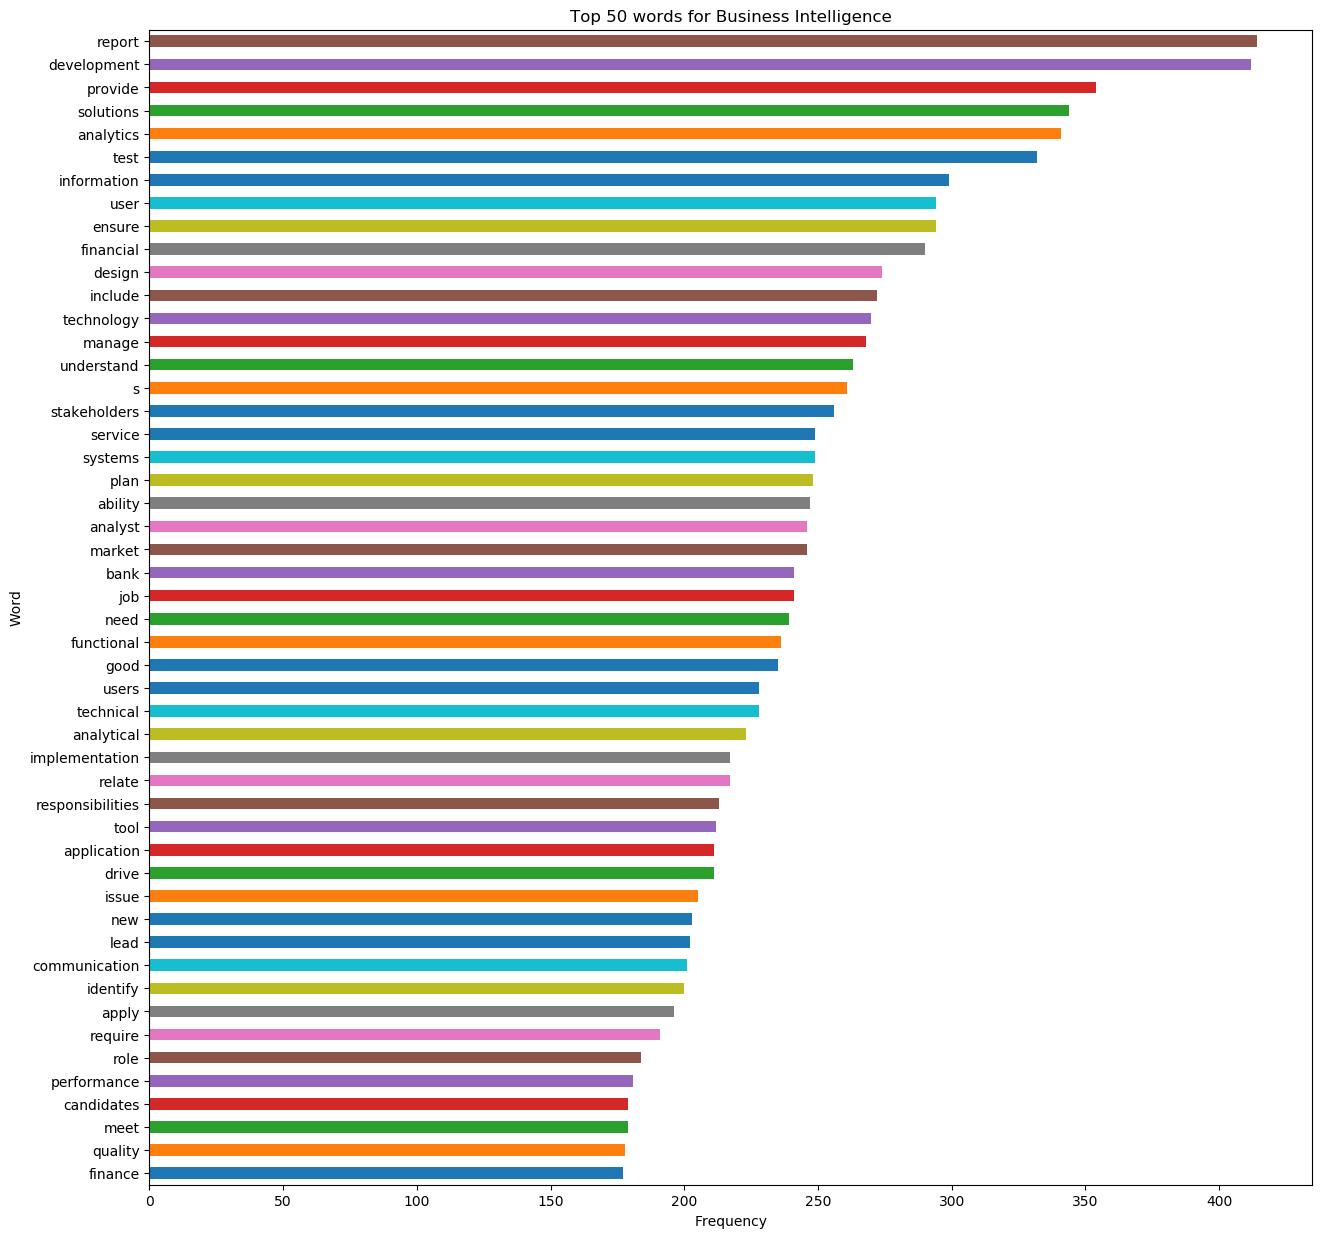

In [113]:
## Plotting for top 50 words for each category

plt.style.use('default')
for job_words, title in [(datasci_top_50_words.sort_values(),'Data Scientist'),(dataana_top_50_words.sort_values(),'Data Analyst'),(bizint_top_50_words.sort_values(),'Business Intelligence')]:
    job_words.plot(kind='barh',figsize=(15,15),title='Top 50 words for {}'.format(title))
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

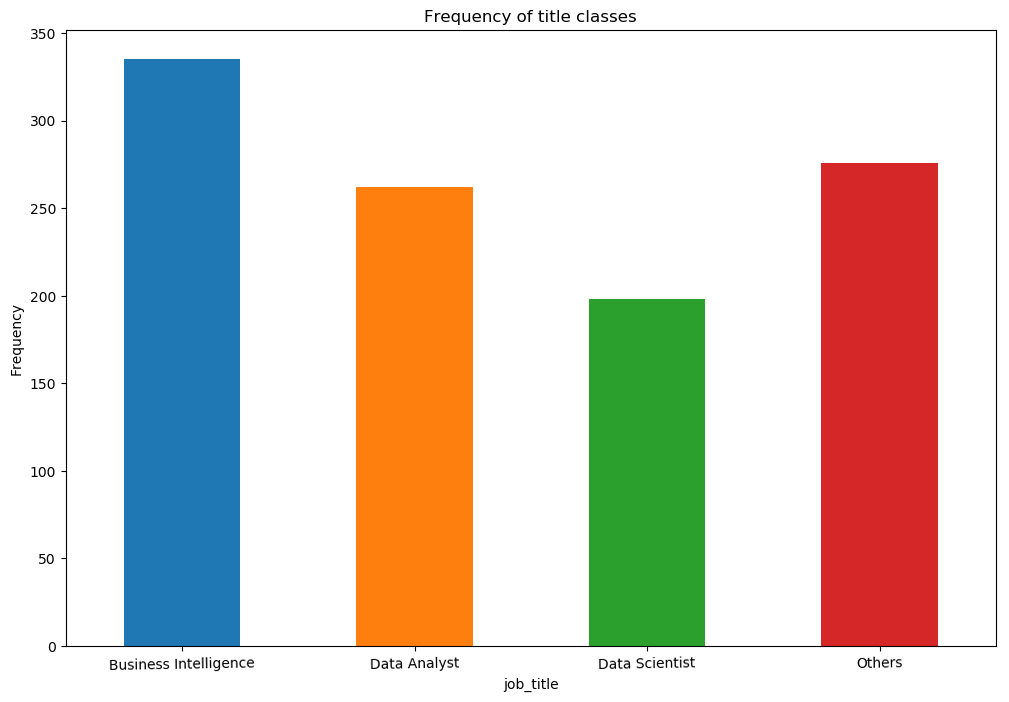

In [100]:
## Frequency of the title classes

plt.figure(figsize=(12,8))
df_2['title_class'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Frequency of title classes')
plt.xlabel('job_title')
plt.ylabel('Frequency')
plt.xticks(np.arange(4),('Business Intelligence','Data Analyst','Data Scientist','Others'),rotation=1)
plt.show()

In [102]:
## Proportion of each class in the dataset

y.value_counts()/(y.value_counts().sum())

3    0.276325
0    0.261484
2    0.250177
1    0.212014
Name: title_class, dtype: float64

In this case, the distribution of jobs are quite even, therefore the problem of class imbalance is avoided

## C_3: Running a grid searched optimized Logistic Regression
Once again, with a similar approach to the previous part, we use a multinomial logistic regression for baseline performance score to be compared against with other complex models.

### C_3_1: Creating the test and training predictors and test sets

In [103]:
## Selecting predictors and target

X = df_3.iloc[:,:-1] ## All columns except class_title
y = df_3.iloc[:,-1]

## Splitting between training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42,stratify = y)

### C_3_2: Running the grid search and fitting logistic regression

In [104]:
clf = LogisticRegression()

## Parameters to test during grid search
parameters = {'C':[1.0,0.1,0.01],'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

clf_gs = GridSearchCV(clf,parameters)
clf_gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1.0, 0.1, 0.01], 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

### B_3_3: Testing fitted logistic regression

In [106]:
y_pred_gs = clf_gs.predict(X_test)

## Checking the result for the above
print pd.DataFrame(confusion_matrix(y_test,y_pred_gs),columns = ['pred_0','pred_1','pred_2','pred_3'], index= ['true_0','true_1','true_2','true_3'])
print classification_report(y_test,y_pred_gs)

        pred_0  pred_1  pred_2  pred_3
true_0      89       5      14      14
true_1       5      88       5       1
true_2       9       9      79      20
true_3      14       3      15      97
             precision    recall  f1-score   support

          0       0.76      0.73      0.74       122
          1       0.84      0.89      0.86        99
          2       0.70      0.68      0.69       117
          3       0.73      0.75      0.74       129

avg / total       0.75      0.76      0.75       467



### B_4_3: Interpreting the model's performance

This model performs decently with f1-score of 0.75. The recall and precision do not experience very big variance between the classes, therefore can be considered moderately consistent.

## C_4: Running gradient boost classifier

We tested a range of classifiers, e.g RandomForest, AdaBoost, GradientBoost, however this gradient boosted technique had the best performance overall.

### B_4_1: Fitting and testing the gradient boost classifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
clf = GradientBoostingClassifier()
gradclass_model = clf.fit(X_train,y_train)

y_pred = gradclass_model.predict(X_test)

## Checking the result for the above
print pd.DataFrame(confusion_matrix(y_test,y_pred),columns = ['pred_0','pred_1','pred_2','pred_3'], index= ['true_0','true_1','true_2','true_3'])
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.74      0.71      0.73       122
          1       0.91      0.84      0.87        99
          2       0.65      0.63      0.64       117
          3       0.67      0.75      0.71       129

avg / total       0.74      0.73      0.73       467

        predict_0  predict_1  predict_2  predict_3
true_0         87          5         14         16
true_1          8         83          8          0
true_2          8          3         74         32
true_3         14          0         18         97


### B_4_2: Interpreting model's performance

The gradient boosted classifier perform's marginally poorer than the logistic regression. Therefore, the logistic regression can be consistently used.

# <u>Appendix</u>
Part B and C have extensive workings and iterations explored <a href="./assets/Section_1.ipynb">here</a> and <a href="./assets/Section_2.ipynb">here</a> respectively